In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path="csv_data/2022_us .csv"
origin_data=pd.read_csv(path,encoding="ISO-8859-1")
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
origin_data.head(3)

C:\Users\yixua\AppData\Local\Temp\ipykernel_164436\545777664.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_data=pd.read_csv(path,encoding="ISO-8859-1")


,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. HORIZONTAL DATUM,15. PARENT CO NAME,16. PARENT CO DB NUM,17. STANDARD PARENT CO NAME,18. FEDERAL FACILITY,19. INDUSTRY SECTOR CODE,20. INDUSTRY SECTOR,21. PRIMARY SIC,22. SIC 2,23. SIC 3,24. SIC 4,25. SIC 5,26. SIC 6,27. PRIMARY NAICS,28. NAICS 2,29. NAICS 3,30. NAICS 4,31. NAICS 5,32. NAICS 6,33. DOC_CTRL_NUM,34. CHEMICAL,35. ELEMENTAL METAL INCLUDED,36. TRI CHEMICAL/COMPOUND ID,37. CAS#,38. SRS ID,39. CLEAN AIR ACT CHEMICAL,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,45. PFAS,46. FORM TYPE,47. UNIT OF MEASURE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,50. 5.3 - WATER,51. 5.4 - UNDERGROUND,52. 5.4.1 - UNDERGROUND CL I,53. 5.4.2 - UNDERGROUND C II-V,54. 5.5.1 - LANDFILLS,55. 5.5.1A - RCRA C LANDFILL,56. 5.5.1B - OTHER LANDFILLS,57. 5.5.2 - LAND TREATMENT,58. 5.5.3 - SURFACE IMPNDMNT,59. 5.5.3A - RCRA SURFACE IM,60. 5.5.3B - OTHER SURFACE I,61. 5.5.4 - OTHER DISPOSAL,62. ON-SITE RELEASE TOTAL,63. 6.1 - POTW - TRNS RLSE,64. 6.1 - POTW - TRNS TRT,65. POTW - TOTAL TRANSFERS,66. 6.2 - M10,67. 6.2 - M41,68. 6.2 - M62,69. 6.2 - M40 METAL,70. 6.2 - M61 METAL,71. 6.2 - M71,72. 6.2 - M81,73. 6.2 - M82,74. 6.2 - M72,75. 6.2 - M63,76. 6.2 - M66,77. 6.2 - M67,78. 6.2 - M64,79. 6.2 - M65,80. 6.2 - M73,81. 6.2 - M79,82. 6.2 - M90,83. 6.2 - M94,84. 6.2 - M99,85. OFF-SITE RELEASE TOTAL,86. 6.2 - M20,87. 6.2 - M24,88. 6.2 - M26,89. 6.2 - M28,90. 6.2 - M93,91. OFF-SITE RECYCLED TOTAL,92. 6.2 - M56,93. 6.2 - M92,94. OFF-SITE ENERGY RECOVERY T,95. 6.2 - M40 NON-METAL,96. 6.2 - M50,97. 6.2 - M54,98. 6.2 - M61 NON-METAL,99. 6.2 - M69,100. 6.2 - M95,101. OFF-SITE TREATED TOTAL,102. 6.2 - UNCLASSIFIED,103. 6.2 - TOTAL TRANSFER,104. TOTAL RELEASES,105. 8.1 - RELEASES,106. 8.1A - ON-SITE CONTAINED,107. 8.1B - ON-SITE OTHER,108. 8.1C - OFF-SITE CONTAIN,109. 8.1D - OFF-SITE OTHER R,110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE,116. PRODUCTION WSTE (8.1-8.7),117. 8.8 - ONE-TIME RELEASE,118. PROD_RATIO_OR_ ACTIVITY,119. 8.9 - PRODUCTION RATIO,Unnamed: 119
0,2022,73098KRRMC906SO,1.100000e+11,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,GARVIN,OK,73098,906.0,The Chickasaw Nation,34.62890,-97.16850,NAD83,CVR ENERGY INC,795416135,CVR ENERGY INC,NO,324,Petroleum,NaN,NaN,NaN,NaN,NaN,NaN,324110,NaN,NaN,NaN,NaN,NaN,1.322220e+12,Certain glycol ethers,NO,N230,N230,649541.0,YES,TRI,NO,May contain metal,NO,NO,NO,R,Pounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,ACTIVITY,1.00,NaN
1,2022,74764WYRHSHIGHW,1.100010e+11,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,MCCURTAIN,OK,74764,907.0,The Choctaw Nation of Oklahoma,33.99840,-95.11150,NAD83,INTERNATIONAL PAPER CO,001316561,INTERNATIONAL PAPER CO,NO,322,Paper,NaN,NaN,NaN,NaN,NaN,NaN,322130,NaN,NaN,NaN,NaN,NaN,1.322220e+12,Lead compounds,NO,N420,N420,650002.0,YES,PBT,YES,Metal complound categories,NO,YES,NO,R,Pounds,0.0,949.0,166.0,0.0,0.0,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,0.0,2948.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2718.0,2718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2718.0,2948.0,0.0,1833.0,1115.0,0.0,0.0,0.0,0.0,0.0,2718.0,0.0,0.0,5666.0,0.0,PRODUCTION,0.97,NaN
2,2022,7453WCLGTT475MI,1.100580e+11,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,COAL,OK,74538,907.0,The Choctaw Nation of Oklahoma,34.58604,-96.28672,NAD83,TARGA RESOURCES CORP,827389847,TARGA RESOURCES CORP,NO,999,Other,NaN,NaN,NaN,NaN,NaN,NaN,211130,NaN,NaN,NaN,NaN,NaN,1.322220e+12,Methanol,NO,0000067561,67-56-1,4283.0,YES,TRI,NO,Non_M

In [3]:
col=["4. FACILITY NAME","5. STREET ADDRESS","6. CITY","8. ST","12. LATITUDE","13. LONGITUDE","20. INDUSTRY SECTOR","47. UNIT OF MEASURE",
"48. 5.1 - FUGITIVE AIR","49. 5.2 - STACK AIR","50. 5.3 - WATER","51. 5.4 - UNDERGROUND","52. 5.4.1 - UNDERGROUND CL I","53. 5.4.2 - UNDERGROUND C II-V",
"54. 5.5.1 - LANDFILLS","55. 5.5.1A - RCRA C LANDFILL","56. 5.5.1B - OTHER LANDFILLS","57. 5.5.2 - LAND TREATMENT","58. 5.5.3 - SURFACE IMPNDMNT",
"59. 5.5.3A - RCRA SURFACE IM","60. 5.5.3B - OTHER SURFACE I","61. 5.5.4 - OTHER DISPOSAL","109. 8.1D - OFF-SITE OTHER R","104. TOTAL RELEASES",
"116. PRODUCTION WSTE (8.1-8.7)","110. 8.2 - ENERGY RECOVER ON","111. 8.3 - ENERGY RECOVER OF","112. 8.4 - RECYCLING ON SITE","113. 8.5 - RECYCLING OFF SIT",
"114. 8.6 - TREATMENT ON SITE","115. 8.7 - TREATMENT OFF SITE"]
select_col=origin_data[col]
new_col=select_col.copy()
new_col=new_col.rename(columns={"4. FACILITY NAME":"Facility_Name","5. STREET ADDRESS":"Street_Address","6. CITY":"City","8. ST":"State","12. LATITUDE":"Latitude","13. LONGITUDE":"Longitude","20. INDUSTRY SECTOR":"Industry_Sector",
                "47. UNIT OF MEASURE":"Unit","48. 5.1 - FUGITIVE AIR":"Fugitive Air","49. 5.2 - STACK AIR":"Stack Air","50. 5.3 - WATER":"Water","51. 5.4 - UNDERGROUND":"Underground","52. 5.4.1 - UNDERGROUND CL I":"Undergroud I","53. 5.4.2 - UNDERGROUND C II-V":"Underground II",
                "54. 5.5.1 - LANDFILLS":"Landfills","55. 5.5.1A - RCRA C LANDFILL":"RCRA C Landfill","56. 5.5.1B - OTHER LANDFILLS":"Other Landfills","57. 5.5.2 - LAND TREATMENT":"Land Treatment","58. 5.5.3 - SURFACE IMPNDMNT":"Surface IM","59. 5.5.3A - RCRA SURFACE IM":"RCRA Surface IM","60. 5.5.3B - OTHER SURFACE I":"Other Surface",
                "61. 5.5.4 - OTHER DISPOSAL":"Other Disposal","109. 8.1D - OFF-SITE OTHER R":"Other_Releases","104. TOTAL RELEASES":"Total_Releases","116. PRODUCTION WSTE (8.1-8.7)":"Production_WSTE"})
new_col.head(3)
       

,Facility_Name,Street_Address,City,State,Latitude,Longitude,Industry_Sector,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Other_Releases,Total_Releases,Production_WSTE,110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,Petroleum,Pounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,33.99840,-95.11150,Paper,Pounds,0.0,949.0,166.0,0.0,0.0,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,0.0,0.0,2948.0,5666.0,0.0,0.0,0.0,2718.0,0.0,0.0
2,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,OK,34.58604,-96.28672,Other,Pounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
petro_pounds=(new_col["Industry_Sector"]=="Petroleum") & (new_col["Unit"]=="Pounds")
select_col1=new_col.loc[petro_pounds]
select_col1.head(3)

,Facility_Name,Street_Address,City,State,Latitude,Longitude,Industry_Sector,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Other_Releases,Total_Releases,Production_WSTE,110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.0,32234.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32234.00,32234.00,0.0,0.0,0.0,0.0,0.0,0.0
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,250.0,750.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1005.29,7758.29,0.0,0.0,0.0,250.0,6503.0,0.0


In [5]:
select_col1["Air"]=select_col1["Fugitive Air"]+select_col1["Stack Air"]
select_col1["Land"]=select_col1["Underground"]+select_col1["Undergroud I"]+select_col1["Underground II"]+select_col1["Landfills"]+select_col1["RCRA C Landfill"]+select_col1["Other Landfills"]+select_col1["Land Treatment"]+select_col1["Surface IM"]+select_col1["RCRA Surface IM"]+select_col1["Other Surface"]+select_col1["Other Disposal"]
select_col.head(3)

C:\Users\yixua\AppData\Local\Temp\ipykernel_164436\623303458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col1["Air"]=select_col1["Fugitive Air"]+select_col1["Stack Air"]
C:\Users\yixua\AppData\Local\Temp\ipykernel_164436\623303458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col1["Land"]=select_col1["Underground"]+select_col1["Undergroud I"]+select_col1["Underground II"]+select_col1["Landfills"]+select_col1["RCRA C Landfill"]+select_col1["Other Landfills"]+select_col1["Land Trea

,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,8. ST,12. LATITUDE,13. LONGITUDE,20. INDUSTRY SECTOR,47. UNIT OF MEASURE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,50. 5.3 - WATER,51. 5.4 - UNDERGROUND,52. 5.4.1 - UNDERGROUND CL I,53. 5.4.2 - UNDERGROUND C II-V,54. 5.5.1 - LANDFILLS,55. 5.5.1A - RCRA C LANDFILL,56. 5.5.1B - OTHER LANDFILLS,57. 5.5.2 - LAND TREATMENT,58. 5.5.3 - SURFACE IMPNDMNT,59. 5.5.3A - RCRA SURFACE IM,60. 5.5.3B - OTHER SURFACE I,61. 5.5.4 - OTHER DISPOSAL,109. 8.1D - OFF-SITE OTHER R,104. TOTAL RELEASES,116. PRODUCTION WSTE (8.1-8.7),110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,Petroleum,Pounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,33.99840,-95.11150,Paper,Pounds,0.0,949.0,166.0,0.0,0.0,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,0.0,0.0,2948.0,5666.0,0.0,0.0,0.0,2718.0,0.0,0.0
2,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,OK,34.58604,-96.28672,Other,Pounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
col1=["Facility_Name","Street_Address","City","State","Latitude","Longitude","Industry_Sector","Unit","Water","Air","Land","Other_Releases",
"Total_Releases","Production_WSTE","110. 8.2 - ENERGY RECOVER ON","111. 8.3 - ENERGY RECOVER OF","112. 8.4 - RECYCLING ON SITE","113. 8.5 - RECYCLING OFF SIT",
"114. 8.6 - TREATMENT ON SITE","115. 8.7 - TREATMENT OFF SITE"]
select_col1=select_col1[col1]
select_col1.head(3)


,Facility_Name,Street_Address,City,State,Latitude,Longitude,Industry_Sector,Unit,Water,Air,Land,Other_Releases,Total_Releases,Production_WSTE,110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.00,32234.0,0.0,0.0,32234.00,32234.00,0.0,0.0,0.0,0.0,0.0,0.0
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.29,1000.0,0.0,5.0,1005.29,7758.29,0.0,0.0,0.0,250.0,6503.0,0.0


In [7]:
select_col1["Energy_Recovery"]=select_col1["110. 8.2 - ENERGY RECOVER ON"]+select_col1["111. 8.3 - ENERGY RECOVER OF"]
select_col1["Recycling"]=select_col1["112. 8.4 - RECYCLING ON SITE"]+select_col1["113. 8.5 - RECYCLING OFF SIT"]
select_col1["Treatment"]=select_col1["114. 8.6 - TREATMENT ON SITE"]+select_col1["115. 8.7 - TREATMENT OFF SITE"]


In [8]:
select_col1= select_col1.drop(["110. 8.2 - ENERGY RECOVER ON","111. 8.3 - ENERGY RECOVER OF","112. 8.4 - RECYCLING ON SITE","113. 8.5 - RECYCLING OFF SIT","114. 8.6 - TREATMENT ON SITE","115. 8.7 - TREATMENT OFF SITE"],axis=1)
select_col1.head(3)

,Facility_Name,Street_Address,City,State,Latitude,Longitude,Industry_Sector,Unit,Water,Air,Land,Other_Releases,Total_Releases,Production_WSTE,Energy_Recovery,Recycling,Treatment
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.00,32234.0,0.0,0.0,32234.00,32234.00,0.0,0.0,0.0
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,Petroleum,Pounds,0.29,1000.0,0.0,5.0,1005.29,7758.29,0.0,250.0,6503.0


In [9]:
select_col1.columns

Index(['Facility_Name', 'Street_Address', 'City', 'State', 'Latitude',
       'Longitude', 'Industry_Sector', 'Unit', 'Water', 'Air', 'Land',
       'Other_Releases', 'Total_Releases', 'Production_WSTE',
       'Energy_Recovery', 'Recycling', 'Treatment'],
      dtype='object')

In [12]:
management_df=select_col1[['Facility_Name', 'Street_Address', 'City', 'State', 'Latitude',
       'Longitude', 'Industry_Sector', 'Unit', 'Water', 'Air', 'Land',
       'Other_Releases', 'Total_Releases','Energy_Recovery', 'Recycling', 'Treatment','Production_WSTE']]
management_df.head()

,Facility_Name,Street_Address,City,State,Latitude,Longitude,Industry_Sector,Unit,Water,Air,Land,Other_Releases,Total_Releases,Energy_Recovery,Recycling,Treatment,Production_WSTE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,Petroleum,Pounds,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,Petroleum,Pounds,0.00,32234.0,0.0,0.0,32234.00,0.0,0.0,0.0,32234.00
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,Petroleum,Pounds,0.29,1000.0,0.0,5.0,1005.29,0.0,250.0,6503.0,7758.29
9,VALERO REFINING CO -OKLAHOMA VALERO ARDMORE RE...,ONE VALERO WAY,ARDMORE,OK,34.20569,-97.10417,Petroleum,Pounds,0.00,1.2,0.0,0.0,1.20,0.0,0.0,0.0,1.20
16,VALERO REFINING CO -OKLAHOMA VALERO ARDMORE RE...,ONE VALERO WAY,ARDMORE,OK,34.20569,-97.10417,Petroleum,Pounds,64.00,376.0,0.0,0.0,440.00,0.0,0.0,10730.0,11170.00


In [24]:
##Note: All of the Recycling , Energy Recovery, Treatment and Total Releases are Production Waste .
# Before we just anlysis the total releases part which occupied only 6%.


In [25]:
s=management_df["State"].unique()
len(s)

51

In [27]:
state=['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND',
'NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','SC','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY']
summary_df=pd.DataFrame({
            "id": np.arange(len(s)),
            "State":state,
            "Energy_Recovery":management_df.groupby(["State"])["Energy_Recovery"].sum(),
            "Recycling":management_df.groupby(["State"])["Recycling"].sum(),
            "Treatment":management_df.groupby(["State"])["Treatment"].sum(),
            "Total_Releases":management_df.groupby(["State"])["Total_Releases"].sum(),
            "Production_WSTE":management_df.groupby(["State"])["Production_WSTE"].sum(),
})
summary_df=summary_df.sort_values(by="Production_WSTE",ascending=False)
summary_df["RecRcy"]=summary_df["Energy_Recovery"]+summary_df["Recycling"]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
summary_df.head(3)


,id,State,Energy_Recovery,Recycling,Treatment,Total_Releases,Production_WSTE,RecRcy
State,,,,,,,,
LA,18,LA,123240609.88,103271951.48,83982522.11,8807921.29,319296762.01,226512561.36
TX,42,TX,158974389.88,16309945.81,113585083.57,22162810.70,310780392.94,175284335.69
PA,38,PA,79711748.97,1178959.37,28827135.20,5735986.30,115453783.44,80890708.34


In [29]:
summary_df.to_csv('production.csv',index=0)

In [28]:
summary_df["RecRcy"]

State
LA   226512561.36
TX   175284335.69
PA    80890708.34
UT    77925467.38
KS    28090955.36
CA    50748784.30
OK    36665750.63
OH    42974298.97
MN    17104274.73
MI    44273629.00
DE    23011032.41
IL      411214.07
AL      812345.30
MT     3935336.88
IN     4093445.30
WA     7263979.30
TN     2590437.74
NJ       13753.62
NM          45.10
NV      198291.94
MS      141064.79
ND       25937.10
KY      113715.00
CO       35012.76
WY      113322.75
VA        8868.00
AR       10690.76
HI       35968.44
WV         783.28
GA      248529.00
NC           0.00
PR           0.00
AK           0.00
IA       52525.01
MO          11.80
WI        2530.14
OR       23513.40
FL       12549.19
AZ        7056.96
MA        6187.74
NY           0.00
NH        2570.72
ID           0.00
DC           0.00
MD           0.00
SC           0.00
NE           1.70
ME           0.10
VI           0.00
VT           0.00
CT           0.00
Name: RecRcy, dtype: float64

In [41]:
import sqlalchemy
#Load the pandas dataframe to a SQlite database.
# Create an engine to access the sqlite database file
engine=sqlalchemy.create_engine('sqlite:///Database/Production_waste.sqlite')

In [43]:
# Convert the dataframe to a "data" table in the db.sqlite database
summary_df.to_sql('Production_waste', if_exists='replace', index=False, con=engine)

51

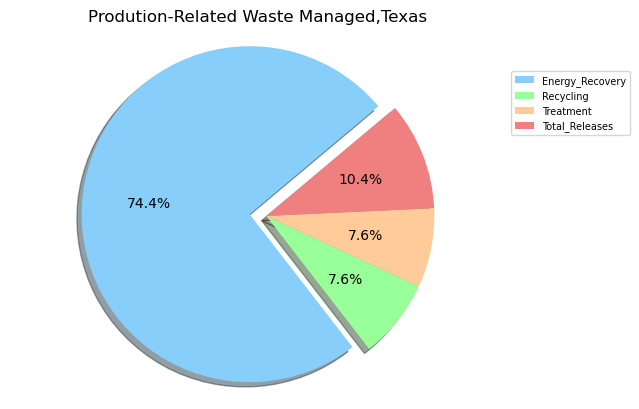

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
labels=["Energy_Recovery","Recycling","Treatment","Total_Releases"]
values=[158974389.88,16309945.81,16309945.81,22162810.70]
colors = ["lightskyblue","#99ff99", "#ffcc99", "lightcoral"]
explode = (0.1, 0, 0, 0)
plt.pie(values,explode=explode,colors=colors,autopct="%1.1f%%",shadow=True,startangle=40)
plt.title("Prodution-Related Waste Managed,Texas")
plt.axis("equal")
plt.legend(["Energy_Recovery","Recycling","Treatment","Total_Releases"],loc='center left',bbox_to_anchor=(1,0.3,0.3,1),prop={"size":7}) 


In [45]:
summary_df["Total_Releases"]/summary_df["Production_WSTE"]

State
LA   0.03
TX   0.07
PA   0.05
UT   0.01
KS   0.01
CA   0.10
OK   0.02
OH   0.03
MN   0.02
MI   0.01
DE   0.15
IL   0.20
AL   0.01
MT   0.02
IN   0.10
WA   0.06
TN   0.02
NJ   0.44
NM   0.05
NV   0.95
MS   0.66
ND   0.13
KY   0.09
CO   0.07
WY   0.25
VA   0.99
AR   0.95
HI   0.25
WV   0.22
GA   0.10
NC   1.00
PR   1.00
AK   0.84
IA   0.06
MO   1.00
WI   0.80
OR   0.01
FL   0.06
AZ   0.35
MA   0.29
NY   1.08
NH   0.00
ID   1.00
DC   1.00
MD   0.93
SC   1.00
NE   0.84
ME   0.99
VI   1.00
VT   1.00
CT   1.00
dtype: float64